In [2]:
library(raster)
dat_s<-stack(list.files(path="../../data/sentinel", pattern=".asc$|.tiff$",full.name=T)[c(2:4,8)])
dat_s

Loading required package: sp


class       : RasterStack 
dimensions  : 1430, 1875, 2681250, 4  (nrow, ncol, ncell, nlayers)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B02, S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B03, S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04, S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08 
min values  :                                            0,                                            0,                                            0,                                            0 
max values  :                                        65535,                                        65535,                                        65535,                                        65535 


In [3]:
dat_s[[4]]

class       : RasterLayer 
dimensions  : 1430, 1875, 2681250  (nrow, ncol, ncell)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/kalab/gismentors/geopython-english/data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08.tiff 
names       : S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08 
values      : 0, 65535  (min, max)


In [4]:
dat_s[[3]]

class       : RasterLayer 
dimensions  : 1430, 1875, 2681250  (nrow, ncol, ncell)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/kalab/gismentors/geopython-english/data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04.tiff 
names       : S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04 
values      : 0, 65535  (min, max)


**NDVI= (nir-red) / (nir+red)**

In [5]:
ndvi<-(dat_s[[4]]-dat_s[[3]])/(dat_s[[4]]+dat_s[[3]])

In [8]:
names(ndvi)<-"ndvi"
ndvi

class       : RasterLayer 
dimensions  : 1430, 1875, 2681250  (nrow, ncol, ncell)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : ndvi 
values      : -0.3786352, 0.9989276  (min, max)


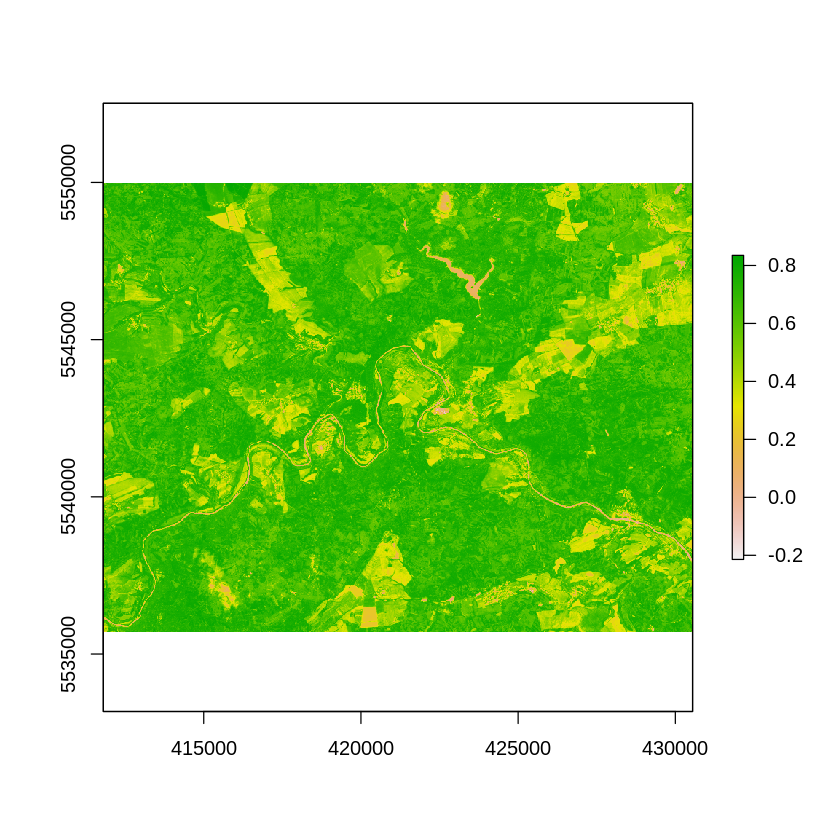

In [9]:
plot(ndvi)

Přístup k hodnotám:

In [10]:
ndvi@data@min

[1] -0.3786352

In [14]:
ndvi@data@values[1:100]

In [15]:
str(ndvi@data@values)

 num [1:2681250] 0.65 0.645 0.637 0.63 0.627 ...


Uložení rastru:

In [16]:
writeRaster(ndvi,"ndvi.tiff")

Možnosti zobrazení v grafu:


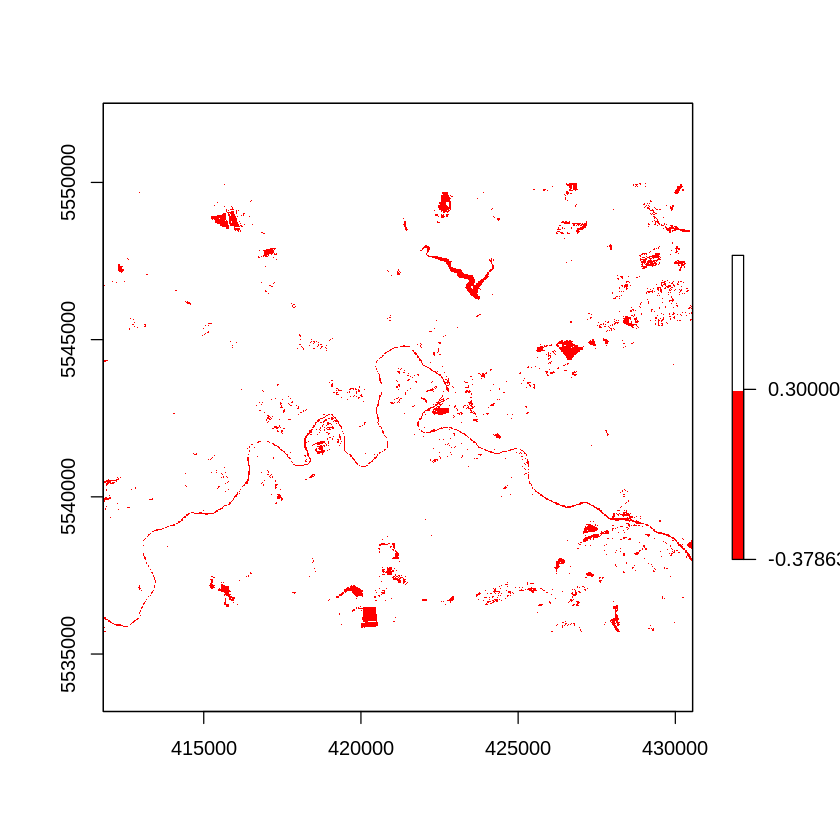

In [17]:
breakpoints <- c(ndvi@data@min,0.3)
colors <- c("red","white")
plot(ndvi,breaks=breakpoints,col=colors)

**Pro práci s družicovými daty je pro R specializovaný balíček RStoolbox. Např. funkce spectralIndices umožňuje vypočítat velké množství indexů.**

In [23]:
library(RStoolbox)
?spectralIndices

In [24]:
spectralIndices(dat_s,red=3,nir=4,indices="ndvi")

class       : RasterLayer 
dimensions  : 1430, 1875, 2681250  (nrow, ncol, ncell)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : NDVI 
values      : -0.3786352, 0.9989276  (min, max)


In [25]:
spectralIndices(dat_s,red=3,nir=4)

Warning message in spectralIndices(dat_s, red = 3, nir = 4):
“EVI/EVI2 parameters L_evi, G, C1 and C2 are defined for reflectance [0,1] but img values are outside of this range.
  If you are using scaled reflectance values please provide the scaleFactor argument.
  If img is in DN or radiance it must be converted to reflectance.
  Skipping EVI calculation.
”

class       : RasterBrick 
dimensions  : 1430, 1875, 2681250, 13  (nrow, ncol, ncell, nlayers)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       :          CTVI,           DVI,         GEMI,         MSAVI,        MSAVI2,          NDVI,          NRVI,           RVI,          SAVI,            SR,           TVI,          TTVI,          WDVI 
min values  :  3.483745e-01, -5.112000e+03,           -?, -3.433914e+00, -1.218095e+00, -3.786352e-01, -9.989276e-01,  5.364807e-04, -5.679119e-01,  4.507101e-01,  3.483745e-01,  3.483745e-01, -5.112000e+03 
max values  :     1.2243070,  6992.0000000,    1.7519550,     0.9989268,     0.9994634,     0.9989276,     0.3786352,     2.2187210,     1.4979898,  1864.0000000,     1.2243070,     1.2243070,  6992.0000000 
